In [80]:
# Imports
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

import plotly.graph_objects as go


In [2]:
def func(x):
    return 2*x+3

In [3]:
X = np.linspace(-5,5, num=51)
print(X)

[-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2
  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5. ]


In [4]:
Y = func(X)
Y_rand = Y + np.random.normal(0,1,size=(Y.shape))
print(Y)
print(Y_rand)

[-7.  -6.6 -6.2 -5.8 -5.4 -5.  -4.6 -4.2 -3.8 -3.4 -3.  -2.6 -2.2 -1.8
 -1.4 -1.  -0.6 -0.2  0.2  0.6  1.   1.4  1.8  2.2  2.6  3.   3.4  3.8
  4.2  4.6  5.   5.4  5.8  6.2  6.6  7.   7.4  7.8  8.2  8.6  9.   9.4
  9.8 10.2 10.6 11.  11.4 11.8 12.2 12.6 13. ]
[-6.35463987 -7.27864555 -7.90447582 -6.52985864 -6.78835138 -4.46233807
 -4.91992575 -2.33336844 -4.6735702  -2.65981237 -2.61504454 -4.19865588
 -1.5392928  -0.30198715 -4.48184855  0.26331691 -1.26465839  0.40235699
 -0.408829   -0.12381545  0.20134353  2.8691528   1.11560846  0.65792663
  2.22718278  2.71038928  4.70248299  2.19740747  3.90248639  3.84176167
  5.43323322  6.58723409  8.07571051  5.98546525  6.84229929  8.11410803
  8.93311231  8.26974501  7.42029336  9.6415783   9.45275378 10.64521674
 10.24158915  9.76233106  9.35065155 10.07808735 11.6501594  11.14670353
 11.71186811 12.4021718  13.68350593]


<IPython.core.display.Javascript object>


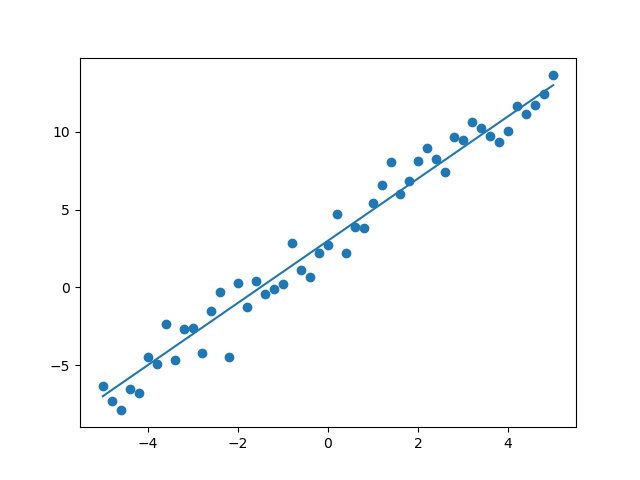

In [5]:
plt.figure()
plt.scatter(X, Y_rand)
plt.plot(X,Y)
plt.show()

In [271]:
# Create Parameters

def initialize_params(seed=None):
    parameters = {}
    if seed:
        np.random.seed(seed)
        parameters["W"] =  4*np.random.randn()
        parameters["b"] =  4*np.random.randn()
    else:
        parameters["W"] = -4
        parameters["b"] = -7
    # print(parameters)
    return parameters

parameters = initialize_params()

W_linspace = np.linspace(-8,8,num=101)
b_linspace = np.linspace(-8,8,num=101)
predict_all = np.zeros((len(W_linspace), len(b_linspace), len(X)))
loss_all = np.zeros((len(W_linspace), len(b_linspace)))
W_mesh, b_mesh = np.meshgrid(W_linspace, b_linspace)
def predict(X, w, b):
    return w*X + b
def loss(pred, Y):
    return 1/len(Y)*np.sum(np.square(pred-Y))

# Ordering causes X:b, Y:W, Z:loss in plot
for i in range(len(W_linspace)):
    for j in range(len(b_linspace)):
        predict_all[i,j,:] = predict(X, W_linspace[i], b_linspace[j])
        # print(k, W_linspace[i], b_linspace[j])
        # print (loss(k, Y))
        loss_all[i,j] = loss(predict_all[i,j,:], Y)
        # print(W_linspace[i], b_linspace[j], loss_all[i,j])


# Y_pred = predict(X, parameters["W"], parameters["b"])
# print(Y_pred)

In [222]:
print(loss(predict(X, parameters["W"], parameters["b"]), Y))
print(loss(predict(X, 1.6, -0.6), Y))
print(loss_all[100, 100])
print(loss_all.shape)

204.96590137022957
14.346666666666668
337.0
(101, 101)


<IPython.core.display.Javascript object>


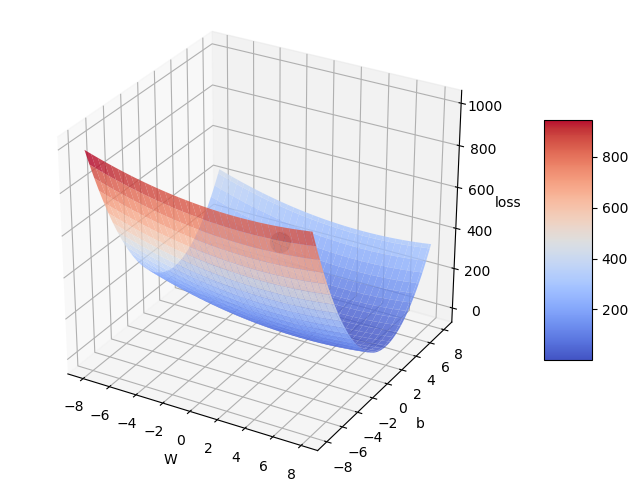

In [223]:
fig = plt.figure(2)
ax = Axes3D(fig)
ax.scatter(parameters["b"], parameters["W"], loss(predict(X, parameters['W'], parameters['b']), Y), color='k', s=200)
loss_plot = ax.plot_surface(W_mesh, b_mesh, loss_all, cmap=cm.coolwarm, alpha=0.8)
ax.set_xlabel('W')
ax.set_ylabel('b')
ax.set_zlabel('loss')
plt.show()

fig.colorbar(loss_plot, shrink=0.5, aspect=5)

In [272]:
plotly_fig = go.Figure()
plotly_fig.add_trace(go.Surface(z=loss_all, x=W_mesh, y=b_mesh, colorscale='viridis'))
plotly_fig.add_trace(go.Scatter3d(x = [parameters["b"], parameters["b"]+0.2], y = [parameters["W"], parameters["W"]+0.2], z = [loss(predict(X, parameters['W'], parameters['b']), Y), loss(predict(X, parameters['W']+0.2, parameters['b']+0.2), Y)]))

plotly_fig.update_layout(width=800,height=800)

plotly_fig.show()

In [225]:
# Defining Gradient Descent

def GradientDescent(X, Y, parameters):
    # We take the entire batch of m training samples and perform gradient descent on the parameters
    # For linear regression, the loss is...
        # L = 1/m sum(Y_hat - Y)^2
        # L = 1/m sum(Wx+b-Y)^2
        # dL/dW = 1/m sum[ 2*(Wx+b-Y)*W ]
        # dL/db = 1/m sum[ 2*(Wx+b-Y)*1 ]
        # Let Wx+b-Y = e , (e)rror term
        # dL/dW = 1/m sum(2*e*W)
        # dL/db = 1/m sum(2*e)
    
    W = parameters["W"]
    b = parameters["b"]
    grads = {}
    
    if type(Y) is not np.float64:
        m = len(Y)
    else:
        m = 1
            
        # Number of training examples
    
    # Normally, we'd use np.matmul(), however because this example is using scalar quantities 
    # (W is a single value)
    # We can proceed with using W*X
    y_hat = W*X+b
    error = W*X+b-Y
    loss = 1/m*np.sum(np.square(error))
    
    # Derivatives
    dL_dW = 1/m*np.sum(2*error*X)
    dL_db = 1/m*np.sum(2*error)
    
    grads["W"] = dL_dW
    grads["b"] = dL_db
    
    return loss, grads

def UpdateParams_GradientDescent(parameters, grads, learning_rate=1e-4):
    # Updates parameters W and b with Gradient Descent
    # If grads are calculated using all training examples then this is BatchGradientDescent
    # If grads are calculated using a SINGLE training example, then this is Stochastic Gradient Descent (SGD)
    
    W = parameters["W"]
    b = parameters["b"]
    
    dL_dW = grads["W"]
    dL_db = grads["b"]
    
    W = W - learning_rate*dL_dW
    b = b - learning_rate*dL_db
    
    parameters["W"] = W
    parameters["b"] = b
    
    return parameters
    

In [226]:
# Running one interation of GD...
parameters_GD = initialize_params(seed=1)
print("Initial Params: " + str(parameters_GD))
_, grads = GradientDescent(X, Y, parameters_GD)
parameters_GD = UpdateParams_GradientDescent(parameters_GD, grads)
print("Updated Params: " + str(parameters_GD))

Initial Params: {'W': 6.497381454652967, 'b': -2.4470256546003015}
Updated Params: {'W': 6.489585993464901, 'b': -2.4459362494693813}


Running Batch Gradient Descent
Initial Params: {'W': -4, 'b': -7}
Updated Params: {'W': 2.0, 'b': 1.7842334540943074}


<IPython.core.display.Javascript object>


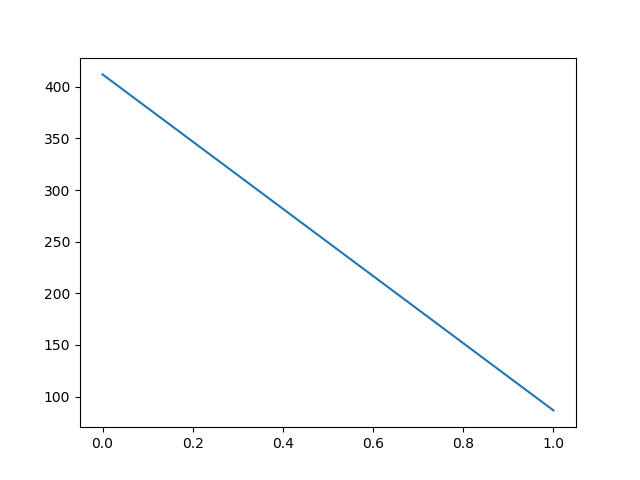

In [313]:
def BatchGradientDescentAlgo(EPOCH=1, learning_rate=5e-2):
    print("Running Batch Gradient Descent")
    parameters_GD = initialize_params()
    print("Initial Params: " + str(parameters_GD))

    epochs = []
    losses = []
    ws = []
    bs = []

    for e in range(EPOCH+1):
        W = parameters_GD["W"]
        b = parameters_GD["b"]
        ws.append(W)
        bs.append(b)
        loss_gd, grads = GradientDescent(X, Y, parameters_GD)
        losses.append(loss_gd)
        parameters_GD = UpdateParams_GradientDescent(parameters_GD, grads, learning_rate=learning_rate)
        epochs.append(e)
        
    return epochs, losses, ws, bs

epochs, losses, ws, bs = BatchGradientDescentAlgo()
print("Updated Params: " + str(parameters_GD))
plt.figure(3)
plt.plot(epochs, losses)
plt.show()

In [314]:
plotly_fig = go.Figure()
plotly_fig.add_trace(go.Surface(z=loss_all, x=W_mesh, y=b_mesh, colorscale='viridis'))
plotly_fig.add_trace(go.Scatter3d(x=bs, y=ws, z=losses, marker=dict(size=4)))
plotly_fig.update_layout(width=800,height=800)

plotly_fig.show()

Initial Params: {'W': -4, 'b': -7}
Updated Params: {'W': 1.9310482368920623, 'b': 1.7996401386377476}
102 102 102 102


<IPython.core.display.Javascript object>


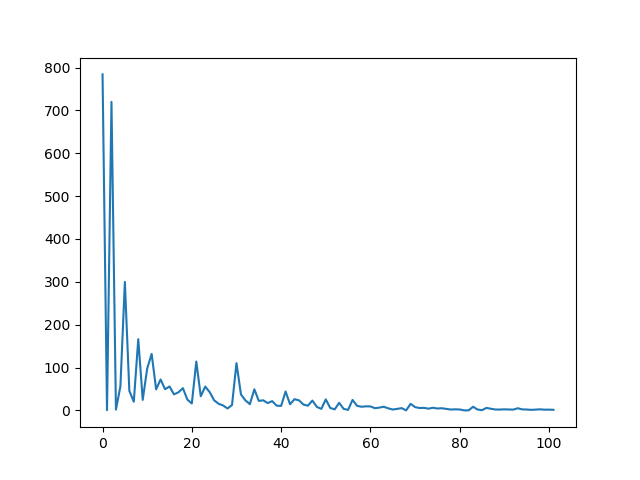

In [315]:
# Stochastic Gradient Descent

# We can perform SGD by performing GradientDescent() on a single training example...
def SGDAlgo(EPOCH=1, learning_rate=5e-2):
    parameters_SGD = initialize_params()
    print("Initial Params: " + str(parameters_SGD))

    epochs_SGD = []
    losses_SGD = []
    testlosses_SGD = []
    ws_SGD = []
    bs_SGD = []
    np.random.seed(2)
    for e in range(X.size*(EPOCH+1)):
        W = parameters_SGD["W"]
        b = parameters_SGD["b"]
        ws_SGD.append(W)
        bs_SGD.append(b)
        test_loss_at_point = loss(predict(X, parameters_SGD["W"], parameters_SGD["b"]), Y)
        testlosses_SGD.append(test_loss_at_point)

        which_index = np.random.randint(0, X.size)
        X_single = X[which_index]
        Y_single = Y[which_index]

        loss_sgd, grads = GradientDescent(X_single, Y_single, parameters_SGD)
        losses_SGD.append(loss_sgd)
        parameters_SGD = UpdateParams_GradientDescent(parameters_SGD, grads, learning_rate=1e-2)

        epochs_SGD.append(e)
    return epochs_SGD, losses_SGD, ws_SGD, bs_SGD, parameters_SGD, testlosses_SGD


epochs_SGD, losses_SGD, ws_SGD, bs_SGD, parameters_SGD, testlosses_SGD = SGDAlgo()
print("Updated Params: " + str(parameters_SGD))
print(len(losses_SGD), len(bs_SGD), len(ws_SGD), len(testlosses_SGD))
plt.figure(4)
plt.plot(epochs_SGD, losses_SGD)
plt.show()

In [316]:
plotly_fig = go.Figure()
plotly_fig.add_trace(go.Surface(z=loss_all, x=W_mesh, y=b_mesh, colorscale='viridis'))
plotly_fig.add_trace(go.Scatter3d(x=bs, y=ws, z=losses, marker=dict(color='red', size=4)))
plotly_fig.add_trace(go.Scatter3d(x=bs_SGD, y=ws_SGD, z=testlosses_SGD, marker=dict(size=4, color='cyan')))
plotly_fig.update_layout(width=800,height=800)

plotly_fig.show()

Running Minibatch Gradient Descent
Initial Params: {'W': -4, 'b': -7}
Updated Params: {'W': 2.527263422032023, 'b': 1.0189900205136884}


<IPython.core.display.Javascript object>


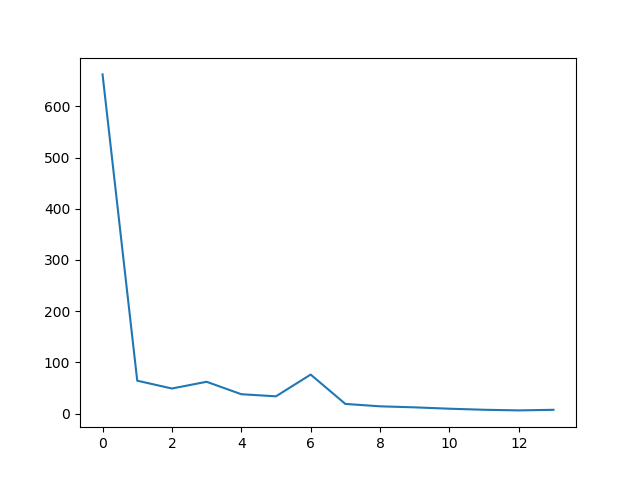

In [317]:
# Minibatch Gradient Descent

def MinibatchGradientDescentAlgo(EPOCH=1, learning_rate=5e-2, batch_size=8):
    print("Running Minibatch Gradient Descent")
    parameters = initialize_params()
    print("Initial Params: " + str(parameters))

    epochs = []
    losses = []
    losses_test = []
    ws = []
    bs = []
    np.random.seed(1)
    
    m = Y.size
    
    num_full_batches = int(m/batch_size)
    batch = 0
    # print(num_batches)
    
    itr = 0
    for e in range(EPOCH+1):
        mini_batches = []
        
        # Shuffle Data
        p = np.random.permutation(len(X))
        X_shuff = X[p]
        Y_shuff = Y[p]
        
        for k in range(num_full_batches):
            mini_batch_X = X_shuff[k*batch_size:(k+1)*batch_size]
            mini_batch_Y = Y_shuff[k*batch_size:(k+1)*batch_size]
            mini_batches.append((mini_batch_X, mini_batch_Y))
            
        if m % batch_size != 0:
            mini_batch_X = X_shuff[num_full_batches*batch_size:]
            mini_batch_Y = Y_shuff[num_full_batches*batch_size:]
            mini_batches.append((mini_batch_X, mini_batch_Y))
        

        
        for minibatch in mini_batches:
            W = parameters["W"]
            b = parameters["b"]
            ws.append(W)
            bs.append(b)
            loss_test = loss(predict(X, W, b), Y)
            losses_test.append(loss_test)
            
            X_mini, Y_mini = minibatch
            
            loss_gd, grads = GradientDescent(X_mini, Y_mini, parameters)
            losses.append(loss_gd)
            parameters = UpdateParams_GradientDescent(parameters, grads, learning_rate=learning_rate)
            epochs.append(itr)
            itr += 1
        
    return epochs, losses, ws, bs, parameters, losses_test

epochs_mini, losses_mini, ws_mini, bs_mini, parameters_mini, testlosses_mini = MinibatchGradientDescentAlgo()
print("Updated Params: " + str(parameters_mini))
# print(len(losses_SGD))
plt.figure(5)
plt.plot(epochs_mini, losses_mini)
plt.show()

In [318]:
plotly_fig = go.Figure()
plotly_fig.add_trace(go.Surface(z=loss_all, x=W_mesh, y=b_mesh, colorscale='viridis'))
plotly_fig.add_trace(go.Scatter3d(x=bs, y=ws, z=losses, marker=dict(color='red', size=3)))
plotly_fig.add_trace(go.Scatter3d(x=bs_SGD, y=ws_SGD, z=testlosses_SGD, marker=dict(size=3, color='cyan')))
plotly_fig.add_trace(go.Scatter3d(x=bs_mini, y=ws_mini, z=testlosses_mini, marker=dict(size=3, color='yellow')))
plotly_fig.update_layout(width=800,height=800)

plotly_fig.show()

In [ ]:
# Momentum

In [ ]:
# RMS Prop

In [ ]:
# ADaM